In [332]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Поиск выбросов и генерация новых признаков</b></h3>

#  Домашнее задание

### Задание  

В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта https://www.kaggle.com/uciml/glass. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.
        а) Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.
        а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
        b) Исследуйте признаки на выбросы несколькими способами.
        c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.
        а) Кратко опишите, какие преобразования были сделаны с данными.
        b) Сравните точность двух моделей.
        c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

##### 1. Загрузила данные.

In [333]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


##### 2. Проведите первичный анализ.

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [335]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [336]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [337]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

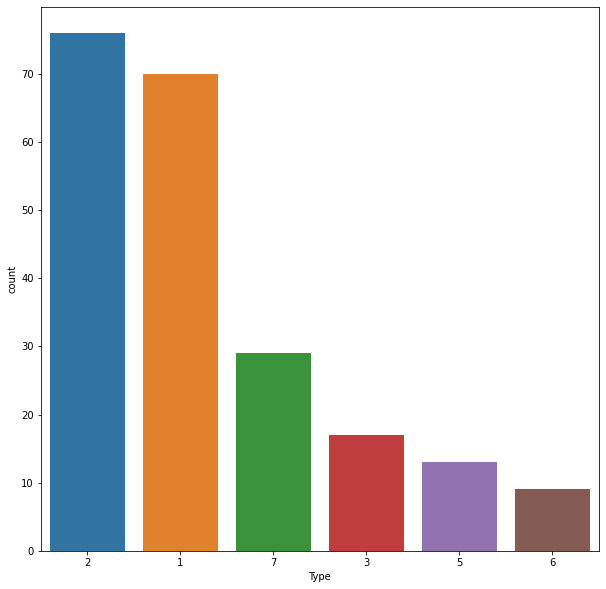

In [338]:
plt.figure(figsize=(10,10))
sns.countplot(x='Type', data=df, order=df['Type'].value_counts().index);

##### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [339]:
X = df.drop('Type', axis=1)
y = df['Type']

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### 4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [341]:
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

##### 5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [342]:
y_pred = forest.predict(X_test)

In [343]:
predict_rfc = pd.DataFrame([y_pred, y_test]).T
predict_rfc.columns = ['predict', 'test']
predict_rfc

,predict,test
0,7,7
1,3,3
2,1,1
3,7,7
4,5,2
5,2,2
6,1,1
7,1,1
8,2,2
9,5,5


In [344]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7441860465116279


###### 6. Обработайте выбросы в данных.
       а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

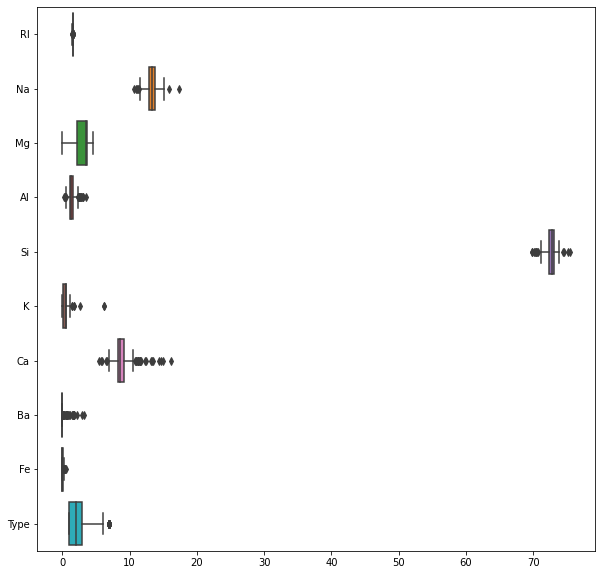

In [345]:
#outlier
plt.figure(figsize=(10,10))
sns.boxplot(data=df, orient="h");

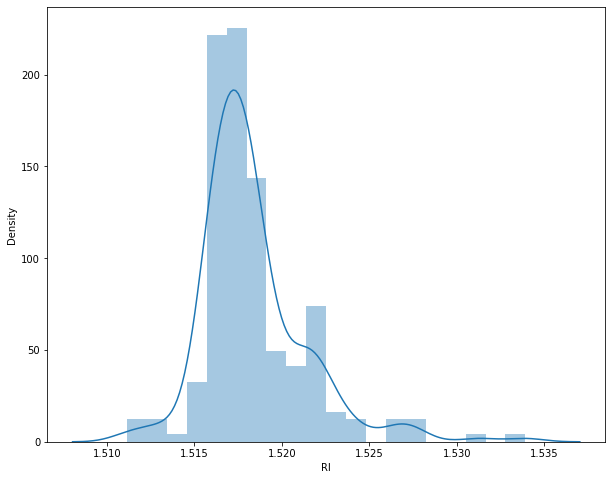

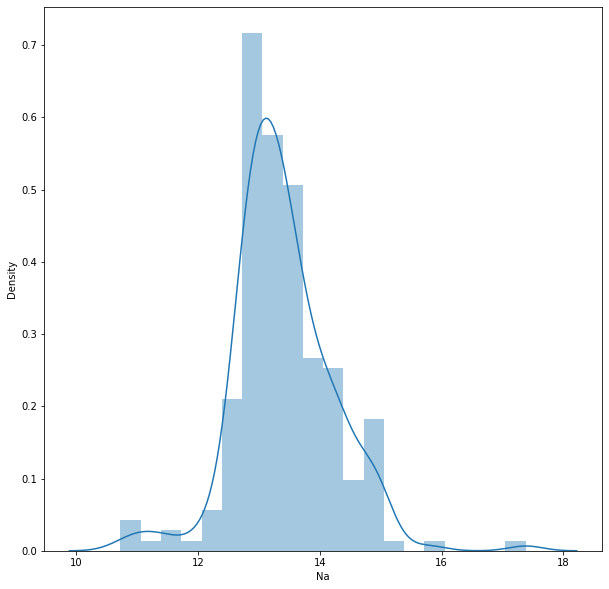

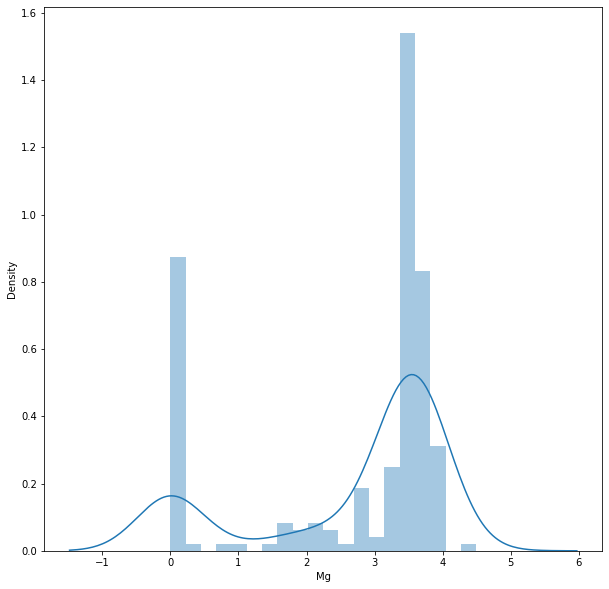

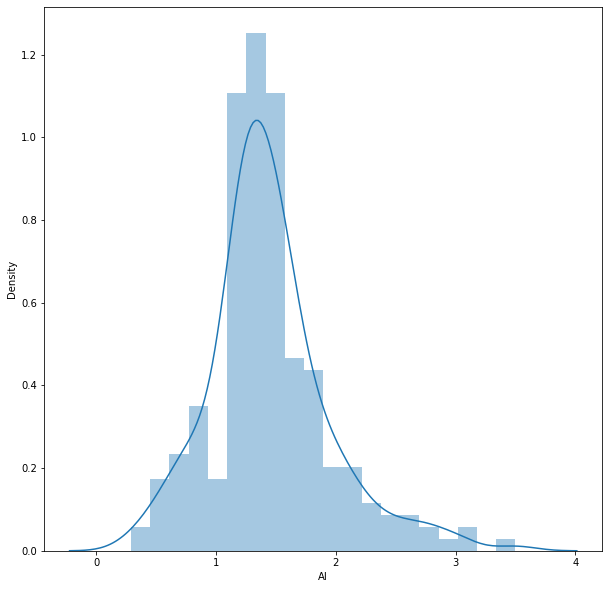

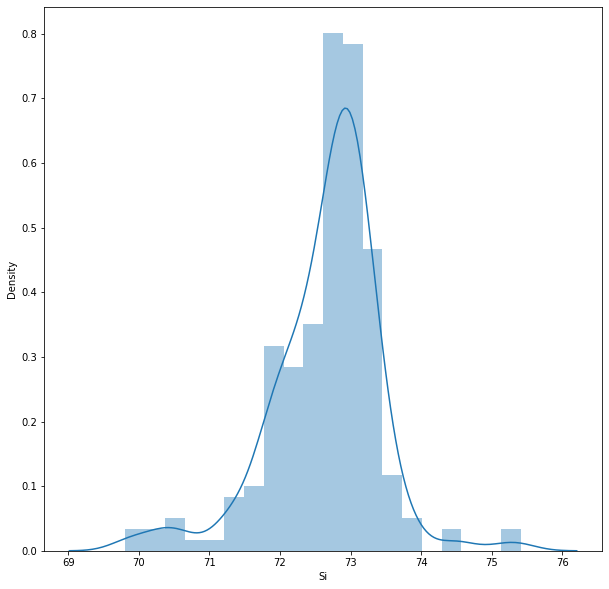

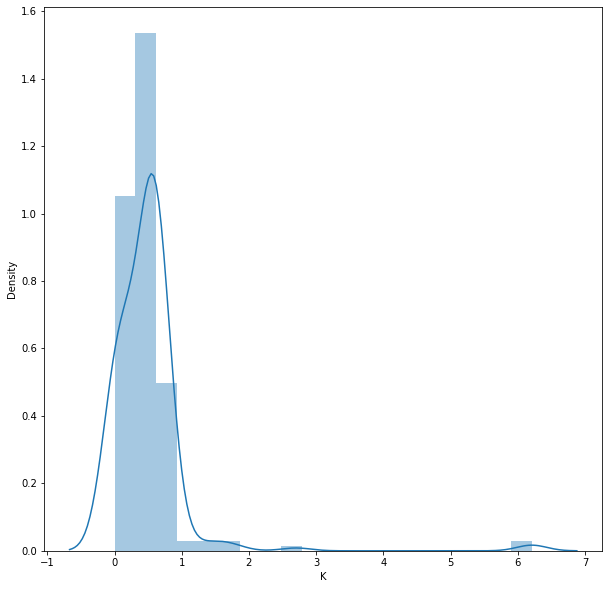

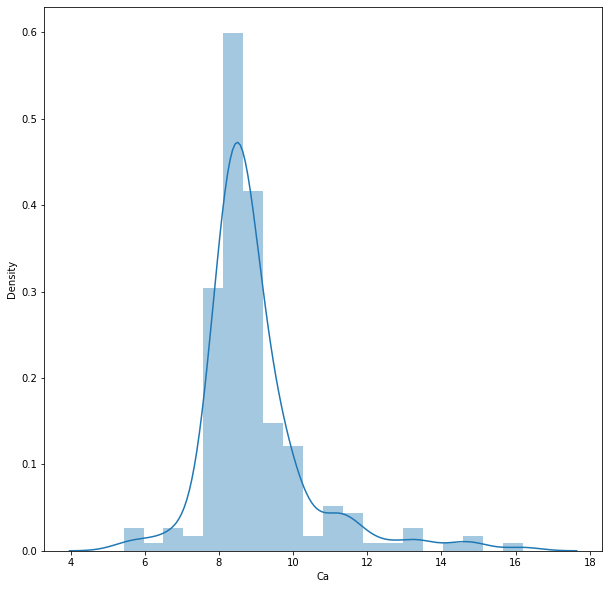

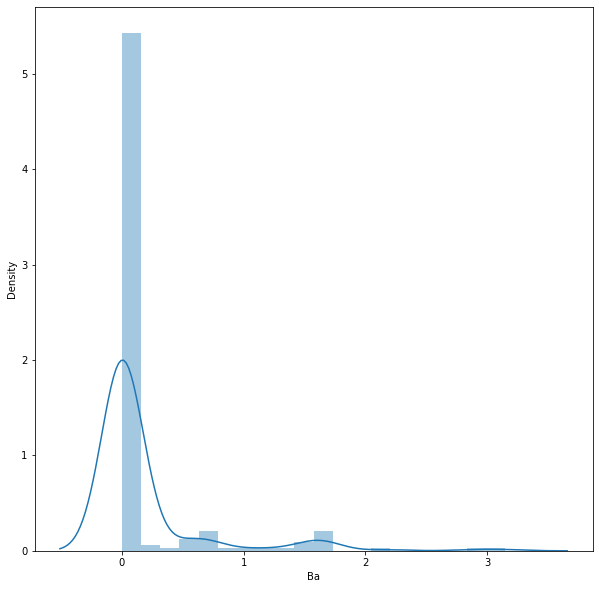

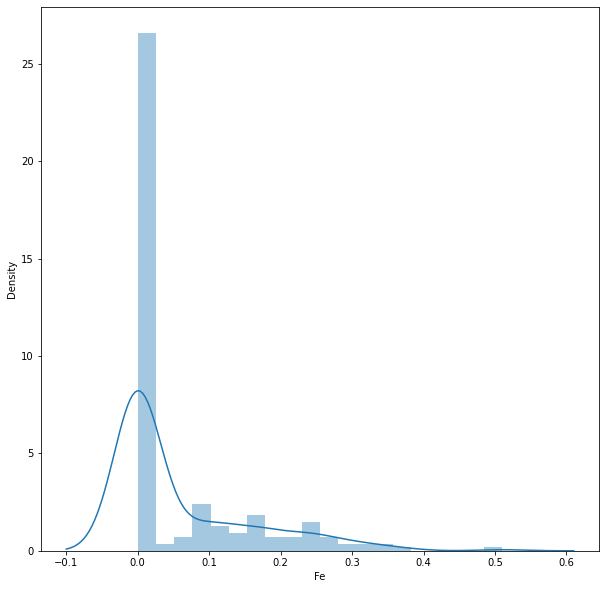

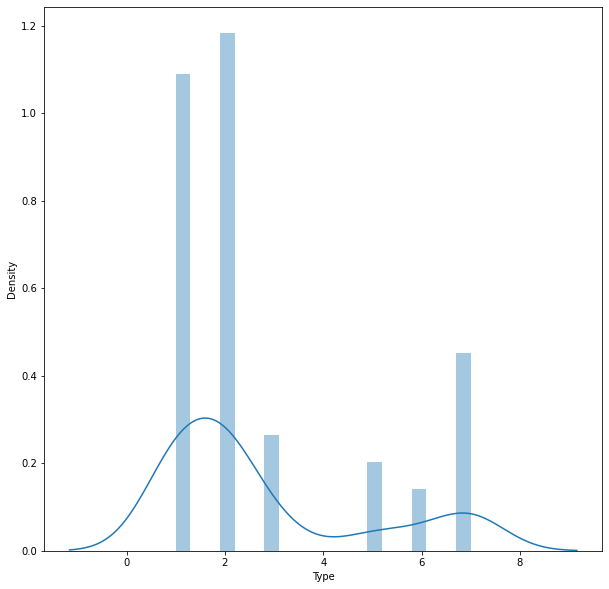

In [346]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10, 8))

features = df.columns.tolist()
for feat in features:
    sns.distplot(df[feat], kde=True, bins=20)
    plt.show()

Есть несколько признаков с распределением близким к нормальному: Ri, Na, Al, Si, Ca

        b) Исследуйте признаки на выбросы несколькими способами.

In [347]:
# Outlier Detection with One class SVM 

model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df)

In [348]:
y_pred_1 = model.predict(df)
y_pred_1

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [349]:
# filter outlier index
outlier_index = np.where(y_pred_1 == -1) 

# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
106,1.53125,10.73,0.0,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.0,1.00,70.16,0.12,16.19,0.00,0.24,2
111,1.52739,11.02,0.0,0.75,73.08,0.00,14.96,0.00,0.00,2
171,1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.00,0.00,5
172,1.51321,13.00,0.0,3.02,70.70,6.21,6.93,0.00,0.00,5
184,1.51115,17.38,0.0,0.34,75.41,0.00,6.65,0.00,0.00,6
185,1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.00,7


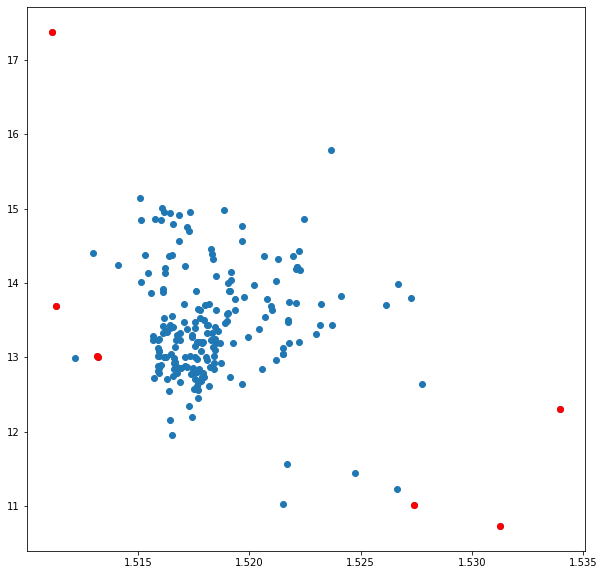

In [350]:
# visualize outputs

plt.scatter(df["RI"], df["Na"])
plt.scatter(outlier_values["RI"], outlier_values["Na"], c = "r")

In [351]:
# Outlier Detection with Isolation Forest

In [352]:
rng = np.random.RandomState(42)

In [353]:
clf = IsolationForest(n_estimators=100, contamination=.03, random_state=rng)
clf.fit(df)

y_pred_2 = clf.predict(df)
y_pred_2

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [354]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [355]:
# filter outlier index
outlier_index = np.where(y_pred_2 == -1) 

# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7


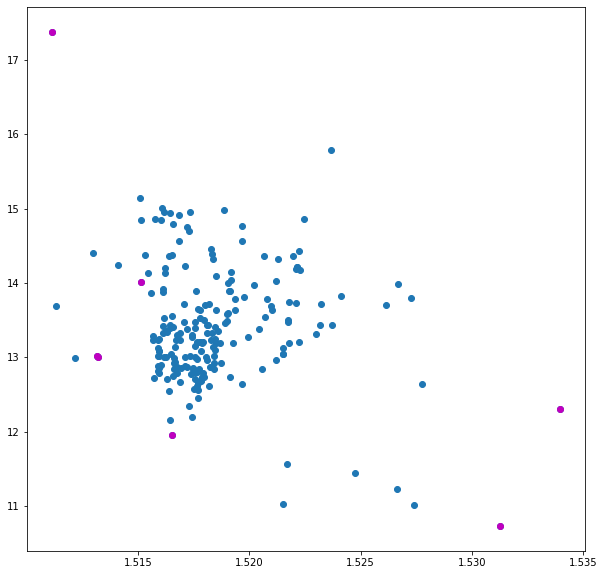

In [356]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(outlier_values.iloc[:,0], outlier_values.iloc[:,1], color='m')
plt.show()

In [357]:
# Outlier Detection with DBSCAN 

In [358]:
scaled_features = StandardScaler().fit_transform(df.values)

In [359]:
db = DBSCAN(eps=4.5, min_samples=10).fit(scaled_features)
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [360]:
# outliers dataframe
outliers = df[db.labels_ == -1]
print(outliers)

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
163  1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.20  0.00     5
171  1.51316  13.02  0.00  3.04  70.48  6.21   6.96  0.00  0.00     5
172  1.51321  13.00  0.00  3.02  70.70  6.21   6.93  0.00  0.00     5
184  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.00  0.00     6


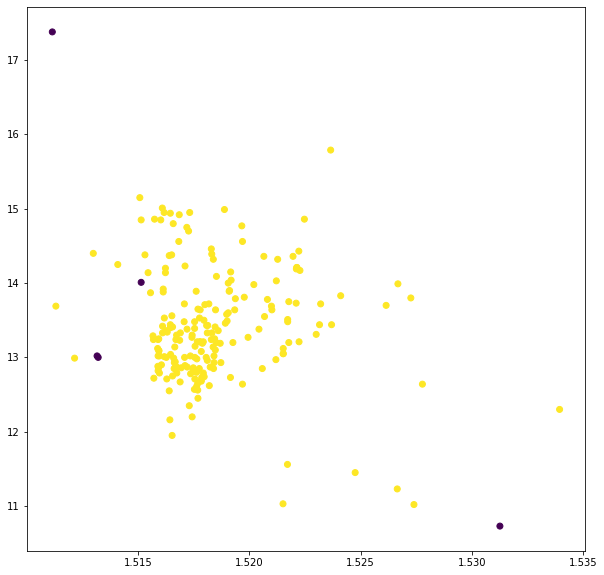

In [361]:
# visualize outputs
colors = db.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = colors)

        c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

In [362]:
df_filtered = df.drop(df.index[[db.labels_ == -1]])
df_filtered.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [363]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      209 non-null    float64
 1   Na      209 non-null    float64
 2   Mg      209 non-null    float64
 3   Al      209 non-null    float64
 4   Si      209 non-null    float64
 5   K       209 non-null    float64
 6   Ca      209 non-null    float64
 7   Ba      209 non-null    float64
 8   Fe      209 non-null    float64
 9   Type    209 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.0 KB


In [364]:
original = df[['Type']].value_counts()
original

Type
2       76
1       70
7       29
3       17
5       13
6        9
dtype: int64

In [365]:
post_processed = df_filtered[['Type']].value_counts()
post_processed

Type
2       75
1       70
7       29
3       17
5       10
6        8
dtype: int64

In [366]:
type_class = [2, 1, 7, 3, 5, 6]
for cls in type_class:
    print(f'Процент удаленных записей для класса {cls}: {(1 - post_processed[cls] / original[cls]):.0%}')

Процент удаленных записей для класса 2: 1%
Процент удаленных записей для класса 1: 0%
Процент удаленных записей для класса 7: 0%
Процент удаленных записей для класса 3: 0%
Процент удаленных записей для класса 5: 23%
Процент удаленных записей для класса 6: 11%


###### 7. Повторите п. 4, п. 5.

In [367]:
X = df_filtered.drop('Type', axis=1)
y = df_filtered['Type']

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [369]:
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [370]:
y_pred = forest.predict(X_test)

In [371]:
predict_rfc = pd.DataFrame([y_pred, y_test]).T
predict_rfc.columns = ['predict', 'test']
predict_rfc

,predict,test
0,7,7
1,7,7
2,2,2
3,2,2
4,1,1
5,1,1
6,2,2
7,2,2
8,1,1
9,5,2


In [372]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


###### 8. Сформулируйте выводы по проделанной работе.
        а) Кратко опишите, какие преобразования были сделаны с данными.
        b) Сравните точность двух моделей.
        c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

- Был произведен первичный анализ данных. 
- Данные были разделены на тестовые и обучающие. 
- Обучила модель дерева решений RandomForestClassifier на обучающем множестве.
- Посчитала точность предсказания модели.
- Исследовала признаки на выбросы 3мя методами: 
        1. OneClassSVM - 7 выбросов
        2. IsolationForest - 7 выбросов
        3. DBSCAN - 5 выбросов
- Все 3 метода нашли 4 одинаковых выброса.
- Удали выбросы найденные по методу DBSCAN.
- На обновленных данных обучила модель RandomForestClassifie.
- Посчитала точность предсказания модели.

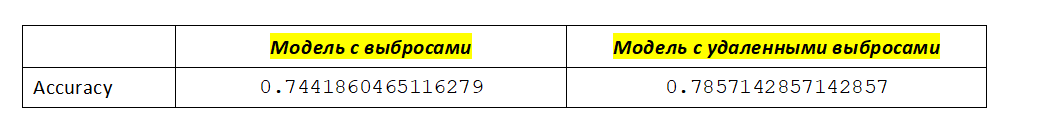

### ВЫВОДЫ: 


Датасет про стекла интересный, но слишком мало данных. Когда данных много, то можно значительно увеличить качество модели и более конкретно говорить о выбросах.
Однозначно данные надо анализировать на выбросы. Поиск выбросов это способ анализа редких и не типичных данных.
Модель обученная на данных очищенных от выбросов показывает лучший результат.
Нужно четко иметь представление о данных, чтобы в погоне за очитской данных от выбросов не удалить валидные значения. 